In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from matplotlib import colors
# from copy import deepcopy

%matplotlib inline

# Simulations #1

Regular Lasso:
-  ✓ Finds optimal balance between fit and regularization
-  ✓ Works even when true β far from 0 (just needs small α)
-  ✓ Fast, deterministic, always converges

Bayesian Lasso:
-  ✗ Prior assumption: β should be near 0 (generative model)
-  ✗ When data contradicts prior, MCMC has convergence issues
-  ✗ Slow, stochastic, may not converge
-  ✗ Fundamentally assumes sparse β near 0 (wrong for this problem)

## Read CSVs

In [2]:
rashomon_csv = "../Results/worst_case/worst_case_rashomon.csv"
# rashomon_csv = "../Results/worst_case/worst_case_rashomon_test.csv"
rashomon_raw_df = pd.read_csv(rashomon_csv)
rashomon_raw_df = rashomon_raw_df.drop("Unnamed: 0", axis=1)
rashomon_raw_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_diff
0,10,0,4,0.881337,1.00,True,-0.025721
1,10,0,8,0.853108,0.75,False,-0.145222
2,10,0,8,0.881042,0.50,False,-0.040949
3,10,0,12,0.839061,0.25,False,-0.353768
4,10,0,8,0.879903,0.75,True,-0.048586


In [3]:
lasso_csv = "../Results/worst_case/worst_case_lasso.csv"
# lasso_csv = "../Results/worst_case/worst_case_lasso_test.csv"
lasso_raw_df = pd.read_csv(lasso_csv)
lasso_raw_df = lasso_raw_df.drop("Unnamed: 0", axis=1)
lasso_raw_df.head()

,n_per_pol,sim_num,MSE,L1_loss,IOU,min_dosage,best_pol_diff
0,10,0,0.837430,0.844811,0.25,False,-0.353768
1,10,1,0.936812,0.946486,0.25,False,-0.213858
2,10,2,0.967341,0.975226,0.25,False,-0.033929
3,10,3,0.845428,0.852686,0.25,False,-0.275869
4,10,4,0.913222,0.922722,0.25,True,-0.646702


In [4]:
tva_csv = "../Results/worst_case/worst_case_tva.csv"
# tva_csv = "../Results/worst_case/worst_case_tva_test.csv"
tva_raw_df = pd.read_csv(tva_csv)
tva_raw_df = tva_raw_df.drop("Unnamed: 0", axis=1)
tva_raw_df.head()

,n_per_pol,sim_num,MSE,TVA_loss,IOU,min_dosage,best_pol_diff
0,10,0,0.837582,0.000791,0.25,False,-0.303160
1,10,1,0.936139,0.001101,0.25,False,-0.151155
2,10,2,0.967507,0.000874,0.25,False,0.014071
3,10,3,0.845270,0.000823,0.25,False,-0.227869
4,10,4,0.912210,0.001100,0.25,True,-0.614702


In [6]:
blasso_csv = "../Results/worst_case/worst_case_blasso.csv"
blasso_raw_df = pd.read_csv(blasso_csv)
blasso_raw_df = blasso_raw_df.drop("Unnamed: 0", axis=1)
blasso_raw_df.head()

,n_per_pol,sim_num,MSE,IOU,min_dosage,best_pol_diff,converged,max_rhat
0,10,0,6.751607,0.25,False,3.749937,False,1.793248
1,10,1,6.653286,0.25,False,3.750444,False,2.415986
2,10,2,5.870631,0.25,False,3.680868,False,2.426051
3,10,3,6.523746,0.25,False,3.751655,False,2.293041
4,10,4,7.121296,0.25,True,3.794338,False,1.812144


In [7]:
bootstrap_csv = "../Results/worst_case/worst_case_bootstrap.csv"
bootstrap_raw_df = pd.read_csv(bootstrap_csv)
bootstrap_raw_df = bootstrap_raw_df.drop("Unnamed: 0", axis=1)
bootstrap_raw_df.head()

,n_per_pol,sim_num,MSE,IOU,min_dosage,best_pol_diff,coverage,mean_ci_width,n_stable_features
0,10,0,0.837373,0.25,False,-0.364112,1.0,1.817437,16
1,10,1,0.815216,0.25,False,-0.228419,1.0,1.730904,16
2,10,2,0.941925,0.25,False,-0.093465,1.0,1.960719,16
3,10,3,0.782182,0.25,False,0.086123,1.0,1.846943,16
4,10,4,0.981333,0.25,True,-0.370936,1.0,1.979949,16


## Summarize rashomon sets results

In [8]:
rashomon_df = rashomon_raw_df.copy()

rashomon_df["best_pol_MSE"] = rashomon_df["best_pol_diff"]**2

group_by_cols = ["n_per_pol", "sim_num"]
result_cols = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_MSE"]
for result_col in result_cols:
    result_min_col = result_col + "_min"
    result_avg_col = result_col + "_mean"
    result_max_col = result_col + "_max"
    result_var_col = result_col + "_var"
    
    rashomon_df[result_min_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("min")
    rashomon_df[result_avg_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("mean")
    rashomon_df[result_max_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("max")
    rashomon_df[result_var_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("var")

rashomon_df = rashomon_df.drop_duplicates(group_by_cols)
rashomon_df = rashomon_df.drop(result_cols, axis=1)
rashomon_df = rashomon_df.drop(["best_pol_diff"], axis=1)
rashomon_df.head(n=10)

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,4,10.000000,16,13.714286,0.836905,0.862054,0.881337,0.000404,...,1.0,0.079241,False,0.250000,True,0.214286,0.000662,0.043614,0.125152,0.002869
8,10,1,4,9.714286,16,15.238095,0.935563,0.979495,1.014376,0.000869,...,1.0,0.092262,False,0.571429,True,0.285714,0.020032,0.029007,0.033546,0.000027
15,10,2,4,9.142857,12,9.142857,0.973522,0.985441,1.008701,0.000156,...,1.0,0.077381,False,0.285714,True,0.238095,0.002493,0.018533,0.058843,0.000693
22,10,3,3,8.461538,16,13.602564,0.844502,0.928921,1.045322,0.007062,...,1.0,0.048448,False,0.230769,True,0.192308,0.000218,0.086231,0.295269,0.009436
35,10,4,4,10.000000,16,13.714286,0.911826,0.937075,0.961889,0.000243,...,1.0,0.079241,True,1.000000,True,0.000000,0.073506,0.292882,0.418223,0.020696
43,10,5,4,10.000000,16,13.714286,0.845869,0.888694,0.933962,0.000799,...,1.0,0.071429,False,0.125000,True,0.125000,0.043484,0.245606,0.584211,0.050958
51,10,6,4,8.000000,12,8.000000,0.975645,1.005981,1.028555,0.000398,...,1.0,0.081250,False,0.600000,True,0.300000,0.047709,0.196010,0.620177,0.057284
56,10,7,4,8.666667,12,9.066667,0.967135,1.002827,1.057550,0.001041,...,1.0,0.068750,False,0.500000,True,0.300000,0.002748,0.052507,0.103329,0.001801
62,10,8,4,10.000000,16,13.714286,0.891382,0.928810,0.973129,0.000734,...,1.0,0.079241,False,0.125000,True,0.125000,0.022368,0.185349,0.305906,0.016954
70,10,10,4,9.142857,12,9.142857,0.963802,0.986926,1.030531,0.000568,...,1.0,0.083333,False,0.142857,True,0.142857,0.000953,0.039588,0.076784,0.000778


## Average over simulations

In [9]:
sum_cols = [
    "num_pools_min", "num_pools_mean", "num_pools_max", "num_pools_var",
    "MSE_min", "MSE_mean", "MSE_max", "MSE_var",
    "IOU_min", "IOU_mean", "IOU_max", "IOU_var",
    "min_dosage_min", "min_dosage_mean", "min_dosage_max", "min_dosage_var",
    "best_pol_MSE_min", "best_pol_MSE_mean", "best_pol_MSE_max", "best_pol_MSE_var"
]

for sum_col in sum_cols:
    rashomon_df[sum_col] = rashomon_df.groupby("n_per_pol")[sum_col].transform("mean")

rashomon_df = rashomon_df.drop_duplicates("n_per_pol")
rashomon_df.head()

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,3.988095,9.375153,14.952381,13.187490,0.872786,0.917145,0.965831,2.232946e-03,...,0.985119,0.076871,0.154762,0.483548,0.988095,0.185069,0.015508,0.082185,0.161488,0.008997
695,20,0,3.926829,8.705738,13.024390,11.124134,0.929321,0.949828,0.975170,8.764604e-04,...,1.000000,0.088192,0.170732,0.484295,1.000000,0.183048,0.005454,0.033269,0.067626,0.002319
1244,50,0,4.000000,7.993127,10.721649,8.750113,0.971932,0.976872,0.981969,2.275141e-05,...,1.000000,0.085367,0.247423,0.559033,1.000000,0.198271,0.002988,0.010386,0.021077,0.000167
1775,100,0,4.000000,7.277778,9.083333,7.023377,0.989611,0.991344,0.993187,4.000324e-06,...,1.000000,0.090472,0.333333,0.616047,1.000000,0.200186,0.001813,0.005170,0.010350,0.000046
2215,500,0,4.000000,7.124286,8.360000,4.950311,0.997304,0.997729,0.998131,1.698072e-07,...,1.000000,0.093685,0.250000,0.621429,1.000000,0.210145,0.000379,0.001042,0.002215,0.000002


In [10]:
lasso_df = lasso_raw_df.copy()

lasso_df["best_pol_MSE"] = lasso_df["best_pol_diff"]**2
sum_cols_lasso = ["MSE", "L1_loss", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_lasso:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    lasso_df[result_min_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("min")
    lasso_df[result_avg_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("mean")
    lasso_df[result_max_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("max")
    lasso_df[result_var_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("var")

lasso_df = lasso_df.drop_duplicates("n_per_pol")
lasso_df = lasso_df.drop(sum_cols_lasso, axis=1)
lasso_df = lasso_df.drop(["best_pol_diff"], axis=1)
lasso_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,L1_loss_min,L1_loss_mean,L1_loss_max,L1_loss_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,0.724482,0.900043,1.203467,0.009615,0.736515,0.909243,1.213634,0.009644,...,0.25,0.000000,False,0.16,True,0.135758,6.192281e-05,0.143518,0.686657,2.610649e-02
100,20,0,0.754491,0.947967,1.175566,0.006188,0.760665,0.955591,1.182386,0.006193,...,0.25,0.000000,False,0.19,True,0.155455,1.903282e-05,0.063556,0.433095,4.925789e-03
200,50,0,0.852459,0.970570,1.054599,0.001870,0.860015,0.976735,1.060880,0.001864,...,0.25,0.000000,False,0.17,True,0.142525,4.345526e-07,0.022034,0.095271,5.623132e-04
300,100,0,0.907737,0.990587,1.083613,0.001336,0.913288,0.996026,1.089340,0.001337,...,0.25,0.000000,False,0.26,True,0.194343,1.667751e-08,0.010507,0.044856,1.206120e-04
400,500,0,0.958612,0.997064,1.033096,0.000255,0.963241,1.001794,1.037877,0.000256,...,0.50,0.000625,False,0.19,True,0.155455,4.080269e-08,0.001734,0.012303,5.166763e-06
500,1000,0,0.968326,0.998711,1.022485,0.000122,0.972897,1.003315,1.027076,0.000122,...,0.50,0.003561,False,0.17,True,0.142525,1.129988e-07,0.000735,0.003423,7.052234e-07


In [11]:
tva_df = tva_raw_df.copy()

tva_df["best_pol_MSE"] = tva_df["best_pol_diff"]**2
sum_cols_tva = ["MSE", "TVA_loss", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_tva:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"

    tva_df[result_min_col] = tva_df.groupby("n_per_pol")[sum_col].transform("min")
    tva_df[result_avg_col] = tva_df.groupby("n_per_pol")[sum_col].transform("mean")
    tva_df[result_max_col] = tva_df.groupby("n_per_pol")[sum_col].transform("max")
    tva_df[result_var_col] = tva_df.groupby("n_per_pol")[sum_col].transform("var")

tva_df = tva_df.drop_duplicates("n_per_pol")
tva_df = tva_df.drop(sum_cols_tva, axis=1)
tva_df = tva_df.drop(["best_pol_diff"], axis=1)
tva_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,TVA_loss_min,TVA_loss_mean,TVA_loss_max,TVA_loss_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,0.723883,0.900211,1.203301,0.009608,0.000661,0.001028,0.001594,3.544903e-08,...,0.25,0.0,False,0.18,True,0.149091,6.192281e-05,0.122988,0.674411,0.021935
100,20,0,0.756153,0.948396,1.175917,0.006184,0.000315,0.000433,0.000594,4.052060e-09,...,0.25,0.0,False,0.23,True,0.178889,5.245701e-05,0.050510,0.392000,0.004064
200,50,0,0.852237,0.971063,1.055190,0.001865,0.000112,0.000142,0.000186,1.850336e-10,...,0.25,0.0,False,0.21,True,0.167576,1.311172e-06,0.016412,0.095271,0.000456
300,100,0,0.907343,0.991238,1.084393,0.001332,0.000050,0.000063,0.000087,3.354596e-11,...,0.25,0.0,False,0.27,True,0.199091,1.256181e-08,0.005984,0.038122,0.000055
400,500,0,0.958601,0.997945,1.034507,0.000258,0.000010,0.000011,0.000012,1.962000e-13,...,0.25,0.0,False,0.23,True,0.178889,3.626001e-06,0.001180,0.008291,0.000003
500,1000,0,0.968409,0.999639,1.023643,0.000122,0.000005,0.000005,0.000006,3.001860e-14,...,0.25,0.0,False,0.22,True,0.173333,9.767335e-08,0.001044,0.008300,0.000002


In [12]:
blasso_df = blasso_raw_df.copy()

blasso_df["best_pol_MSE"] = blasso_df["best_pol_diff"]**2
sum_cols_blasso = ["MSE", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_blasso:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"

    blasso_df[result_min_col] = blasso_df.groupby("n_per_pol")[sum_col].transform("min")
    blasso_df[result_avg_col] = blasso_df.groupby("n_per_pol")[sum_col].transform("mean")
    blasso_df[result_max_col] = blasso_df.groupby("n_per_pol")[sum_col].transform("max")
    blasso_df[result_var_col] = blasso_df.groupby("n_per_pol")[sum_col].transform("var")

blasso_df = blasso_df.drop_duplicates("n_per_pol")
blasso_df = blasso_df.drop(sum_cols_blasso, axis=1)
blasso_df = blasso_df.drop(["best_pol_diff"], axis=1)
blasso_df.head(n=10)

,n_per_pol,sim_num,converged,max_rhat,MSE_min,MSE_mean,MSE_max,MSE_var,IOU_min,IOU_mean,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,False,1.793248,5.014585,6.475388,7.806189,0.271180,0.25,0.25,0.25,0.0,False,0.07,True,0.065758,1.291096e+01,13.955804,14.662169,0.117059
100,20,0,False,1.635266,5.730616,6.627778,7.748782,0.114151,0.25,0.25,0.25,0.0,False,0.09,True,0.082727,1.356764e+01,14.289722,14.881221,0.064615
200,50,0,False,1.527210,6.085017,6.647496,7.128959,0.053146,0.25,0.25,0.25,0.0,False,0.12,True,0.106667,1.389949e+01,14.436215,14.768119,0.030587
300,100,0,False,31.363396,1.019434,5.488996,7.135926,2.958763,0.25,0.25,0.25,0.0,False,0.08,True,0.074343,1.558068e-01,11.386948,14.755921,18.922413
400,500,0,False,1.863293,0.967810,1.169293,6.870501,0.980947,0.25,0.25,0.25,0.0,False,0.18,True,0.149091,2.314585e-07,0.447707,14.737450,6.326682
500,1000,0,False,1.446222,0.957653,1.005615,1.615223,0.003935,0.25,0.25,0.25,0.0,False,0.13,True,0.114242,9.359409e-08,0.018252,1.415822,0.019958


In [13]:
bootstrap_df = bootstrap_raw_df.copy()

bootstrap_df["best_pol_MSE"] = bootstrap_df["best_pol_diff"]**2
sum_cols_bootstrap = ["MSE", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_bootstrap:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"

    bootstrap_df[result_min_col] = bootstrap_df.groupby("n_per_pol")[sum_col].transform("min")
    bootstrap_df[result_avg_col] = bootstrap_df.groupby("n_per_pol")[sum_col].transform("mean")
    bootstrap_df[result_max_col] = bootstrap_df.groupby("n_per_pol")[sum_col].transform("max")
    bootstrap_df[result_var_col] = bootstrap_df.groupby("n_per_pol")[sum_col].transform("var")

bootstrap_df = bootstrap_df.drop_duplicates("n_per_pol")
bootstrap_df = bootstrap_df.drop(sum_cols_bootstrap, axis=1)
bootstrap_df = bootstrap_df.drop(["best_pol_diff"], axis=1)
bootstrap_df.head(n=10)

,n_per_pol,sim_num,coverage,mean_ci_width,n_stable_features,MSE_min,MSE_mean,MSE_max,MSE_var,IOU_min,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,1.0,1.817437,16,0.644889,0.887197,1.115552,0.010090,0.25,...,0.25,0.0,False,0.27,True,0.199091,1.501211e-05,0.124472,0.702062,0.020890
100,20,0,1.0,1.308551,16,0.750365,0.941138,1.157655,0.006080,0.25,...,0.25,0.0,False,0.27,True,0.199091,4.907541e-05,0.075772,0.407465,0.007607
200,50,0,1.0,0.751830,16,0.863395,0.971058,1.123855,0.001861,0.25,...,0.25,0.0,False,0.26,True,0.194343,6.776862e-06,0.028127,0.196128,0.001047
300,100,0,1.0,0.522937,16,0.910110,0.989355,1.133599,0.001296,0.25,...,0.25,0.0,False,0.16,True,0.135758,1.002302e-06,0.013745,0.091800,0.000220
400,500,0,1.0,0.164292,15,0.961185,0.996259,1.031750,0.000212,0.25,...,0.25,0.0,False,0.16,True,0.135758,3.008095e-07,0.002214,0.009204,0.000004
500,1000,0,1.0,0.090749,11,0.959714,0.998544,1.026212,0.000138,0.25,...,0.25,0.0,False,0.18,True,0.149091,9.067884e-08,0.000752,0.006799,0.000001


## Plots

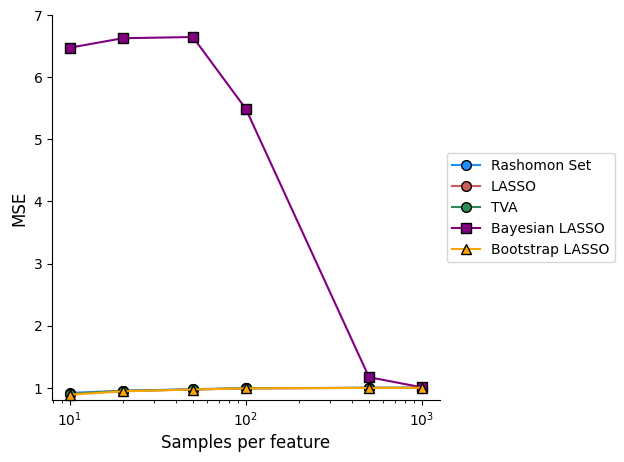

In [26]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(tva_df["n_per_pol"], tva_df["MSE_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")

ax.plot(blasso_df["n_per_pol"], blasso_df["MSE_mean"],
        color="purple", zorder=3.5, clip_on=False,
        marker="s", markeredgecolor="black", markersize=7,
        label="Bayesian LASSO")

ax.plot(bootstrap_df["n_per_pol"], bootstrap_df["MSE_mean"],
        color="orange", zorder=3.5, clip_on=False,
        marker="^", markeredgecolor="black", markersize=7,
        label="Bootstrap LASSO")

ax.set_xscale("log")
ax.set_xlabel("Samples per feature", fontsize=12)
ax.set_ylim(0.8, 7)
# ax.set_yscale("log")
ax.set_ylabel("MSE", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("../Figures/worst_case/MSE.png", dpi=300, bbox_inches="tight")
plt.show()

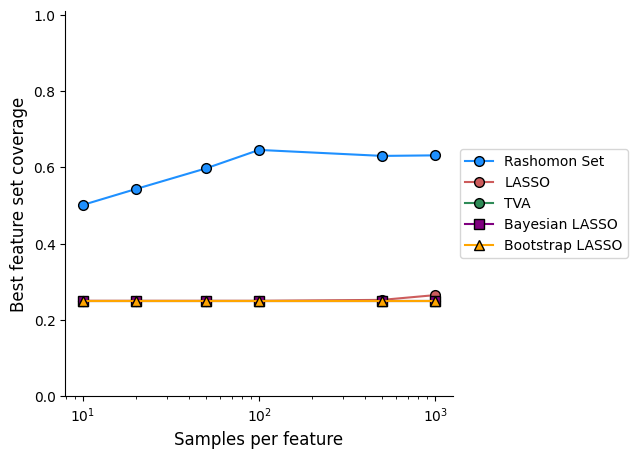

In [21]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(tva_df["n_per_pol"], tva_df["IOU_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")

ax.plot(blasso_df["n_per_pol"], blasso_df["IOU_mean"],
        color="purple", zorder=3.5, clip_on=False,
        marker="s", markeredgecolor="black", markersize=7,
        label="Bayesian LASSO")

ax.plot(bootstrap_df["n_per_pol"], bootstrap_df["IOU_mean"],
        color="orange", zorder=3.5, clip_on=False,
        marker="^", markeredgecolor="black", markersize=7,
        label="Bootstrap LASSO")

ax.set_xscale("log")
ax.set_xlabel("Samples per feature", fontsize=12)
ax.set_ylim(0, 1.01)
ax.set_ylabel("Best feature set coverage", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("../Figures/worst_case/feature_coverage.png", dpi=300, bbox_inches="tight")
plt.show()

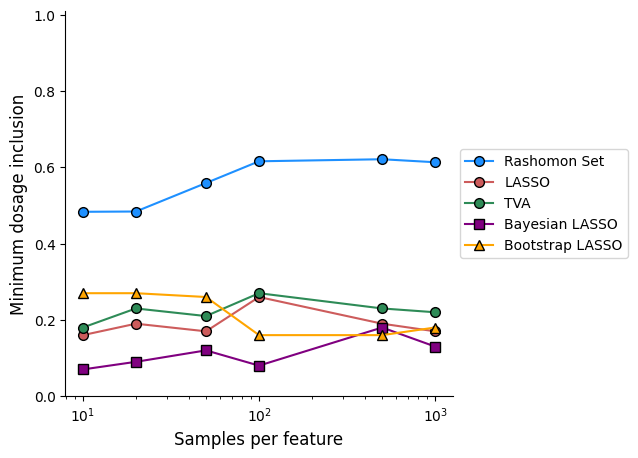

In [22]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["min_dosage_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["min_dosage_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(tva_df["n_per_pol"], tva_df["min_dosage_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")

ax.plot(blasso_df["n_per_pol"], blasso_df["min_dosage_mean"],
        color="purple", zorder=3.5, clip_on=False,
        marker="s", markeredgecolor="black", markersize=7,
        label="Bayesian LASSO")

ax.plot(bootstrap_df["n_per_pol"], bootstrap_df["min_dosage_mean"],
        color="orange", zorder=3.5, clip_on=False,
        marker="^", markeredgecolor="black", markersize=7,
        label="Bootstrap LASSO")

ax.set_xscale("log")
ax.set_xlabel("Samples per feature", fontsize=12)
ax.set_ylim(0, 1.01)
ax.set_ylabel("Minimum dosage inclusion", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("../Figures/worst_case/min_dosage_inclusion_ct.png", dpi=300, bbox_inches="tight")
plt.show()

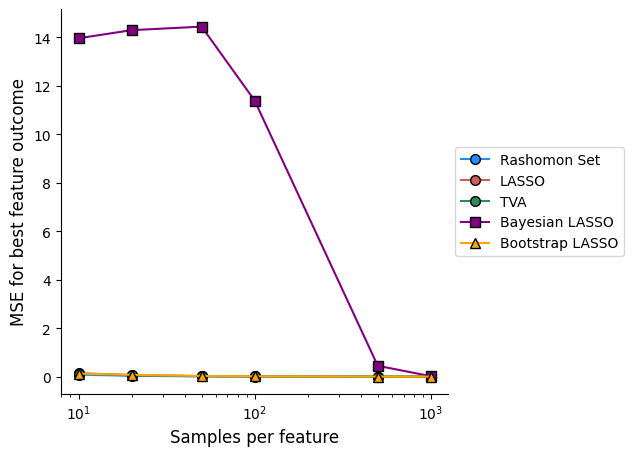

In [23]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(tva_df["n_per_pol"], tva_df["best_pol_MSE_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")

ax.plot(blasso_df["n_per_pol"], blasso_df["best_pol_MSE_mean"],
        color="purple", zorder=3.5, clip_on=False,
        marker="s", markeredgecolor="black", markersize=7,
        label="Bayesian LASSO")

ax.plot(bootstrap_df["n_per_pol"], bootstrap_df["best_pol_MSE_mean"],
        color="orange", zorder=3.5, clip_on=False,
        marker="^", markeredgecolor="black", markersize=7,
        label="Bootstrap LASSO")

ax.set_xscale("log")
ax.set_xlabel("Samples per feature", fontsize=12)
# ax.set_ylim(0, 1)
ax.set_ylabel("MSE for best feature outcome", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("../Figures/worst_case/best_feature_MSE.png", dpi=300, bbox_inches="tight")
plt.show()

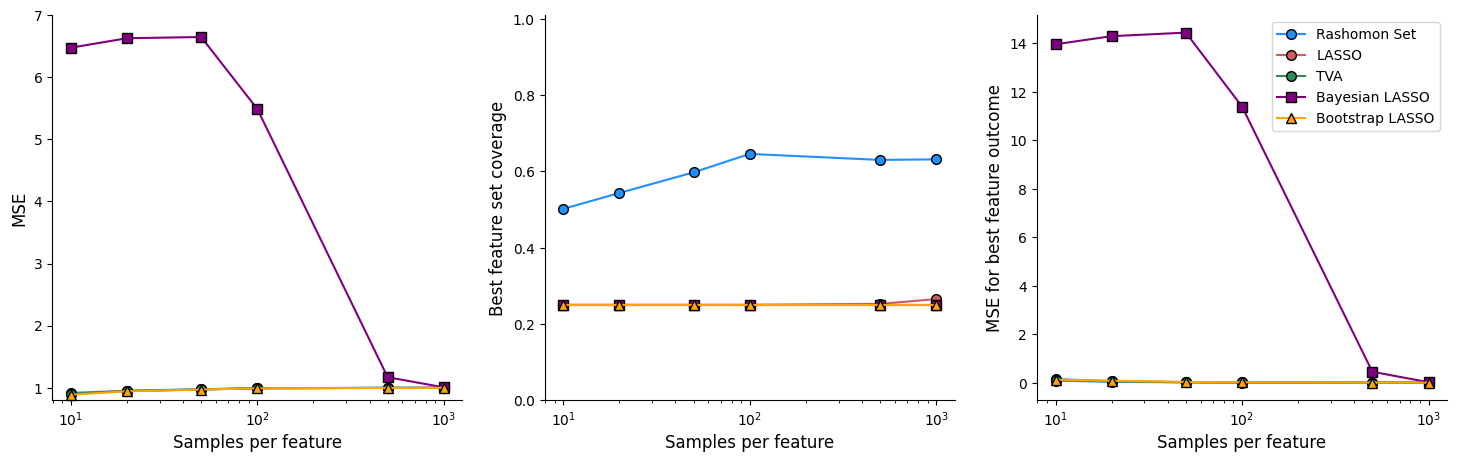

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i in range(3):
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].set_xscale("log")
    ax[i].set_xlabel("Samples per feature", fontsize=12)


ax[0].plot(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")
ax[0].plot(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")
ax[0].plot(tva_df["n_per_pol"], tva_df["MSE_mean"],
        color="seagreen", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")
ax[0].plot(blasso_df["n_per_pol"], blasso_df["MSE_mean"],
        color="purple", zorder=3, clip_on=False,
        marker="s", markeredgecolor="black", markersize=7,
        label="Bayesian LASSO")
ax[0].plot(bootstrap_df["n_per_pol"], bootstrap_df["MSE_mean"],
        color="orange", zorder=3, clip_on=False,
        marker="^", markeredgecolor="black", markersize=7,
        label="Bootstrap LASSO")

ax[0].set_ylim(0.8, 7)
ax[0].set_ylabel("MSE", fontsize=12)

ax[1].plot(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax[1].plot(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax[1].plot(tva_df["n_per_pol"], tva_df["IOU_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")

ax[1].plot(blasso_df["n_per_pol"], blasso_df["IOU_mean"],
        color="purple", zorder=3.5, clip_on=False,
        marker="s", markeredgecolor="black", markersize=7,
        label="Bayesian LASSO")

ax[1].plot(bootstrap_df["n_per_pol"], bootstrap_df["IOU_mean"],
        color="orange", zorder=3.5, clip_on=False,
        marker="^", markeredgecolor="black", markersize=7,
        label="Bootstrap LASSO")

ax[1].set_ylim(0, 1.01)
ax[1].set_ylabel("Best feature set coverage", fontsize=12)


ax[2].plot(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax[2].plot(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax[2].plot(tva_df["n_per_pol"], tva_df["best_pol_MSE_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")

ax[2].plot(blasso_df["n_per_pol"], blasso_df["best_pol_MSE_mean"],
        color="purple", zorder=3.5, clip_on=False,
        marker="s", markeredgecolor="black", markersize=7,
        label="Bayesian LASSO")

ax[2].plot(bootstrap_df["n_per_pol"], bootstrap_df["best_pol_MSE_mean"],
        color="orange", zorder=3.5, clip_on=False,
        marker="^", markeredgecolor="black", markersize=7,
        label="Bootstrap LASSO")

ax[2].set_ylabel("MSE for best feature outcome", fontsize=12)


ax[2].legend(loc="upper right")#, bbox_to_anchor=(0.5, 0.5))

plt.savefig("../Figures/worst_case/mse_coverage_best_eff.png", dpi=300, bbox_inches="tight")

plt.show()

### Heat map

In [ ]:
heatmap_df = rashomon_raw_df.copy()

reg = 1e-2
heatmap_df["loss"] = heatmap_df["MSE"] + reg * heatmap_df["num_pools"]
heatmap_df["posterior"] = np.exp(-heatmap_df["loss"])
# heatmap_df["posterior"] = (heatmap_df["posterior"] - np.max(heatmap_df["posterior"])) / np.max(heatmap_df["posterior"])
# heatmap_df["posterior"] = (heatmap_df["posterior"] - np.min(heatmap_df["posterior"])) / \
#     (np.max(heatmap_df["posterior"]) - np.min(heatmap_df["posterior"]))


heatmap_dfs = [None]*4
heatmap_dfs[0] = heatmap_df[heatmap_df["n_per_pol"] == 10].copy()
heatmap_dfs[1] = heatmap_df[heatmap_df["n_per_pol"] == 50].copy()
heatmap_dfs[2] = heatmap_df[heatmap_df["n_per_pol"] == 100].copy()
heatmap_dfs[3] = heatmap_df[heatmap_df["n_per_pol"] == 1000].copy()
for i in range(4):
    heatmap_dfs[i]["posterior"] = (heatmap_dfs[i]["posterior"] - np.max(heatmap_dfs[i]["posterior"])) / np.max(heatmap_dfs[i]["posterior"])
    # heatmap_dfs[i]["posterior"] = (heatmap_dfs[i]["posterior"] - np.min(heatmap_dfs[i]["posterior"])) / \
    #     (np.max(heatmap_dfs[i]["posterior"]) - np.min(heatmap_dfs[i]["posterior"]))

In [ ]:
heatmap_df.head()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

from matplotlib import colors

h = ax[0, 0].hist2d(heatmap_dfs[0]["num_pools"], heatmap_dfs[0]["posterior"], norm=colors.LogNorm(),
             cmap="OrRd",
             weights=[1e-2]*len(heatmap_dfs[0])
            #  weights=[1]*len(heatmap_dfs[0])
             )
ax[0, 0].set_title("Samples per feature = 10", fontsize=12)
cb_00 = fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[0, 0])
# ticks_00 = [0.01, 0.1, 0.5, 1]
# # ticks_00 = [0.01, 0.1, 1, 10, 20, 100]
# # ticks_00 = [1, 10, 20, 40]
# cb_00.set_ticks(ticks_00)
# cb_00.set_ticklabels(ticks_00)


h = ax[0, 1].hist2d(heatmap_dfs[1]["num_pools"], heatmap_dfs[1]["posterior"], norm=colors.LogNorm(),
             cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[1]))
ax[0, 1].set_title("Samples per feature = 50", fontsize=12)
cb_01 = fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[0, 1])
# ticks_01 = [0.01, 0.1, 0.5, 1]
# # ticks_01 = [0.01, 0.1, 1, 10, 40]
# # ticks_01 = [1, 10, 30, 60]
# cb_01.set_ticks(ticks_01)
# cb_01.set_ticklabels(ticks_01)

h = ax[1, 0].hist2d(heatmap_dfs[2]["num_pools"], heatmap_dfs[2]["posterior"], norm=colors.LogNorm(),
             cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[2]))
ax[1, 0].set_title("Samples per feature = 100", fontsize=12)
cb_10 = fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[1, 0])
# ticks_10 = [0.01, 0.1, 0.5, 1]
# # ticks_10 = [0.01, 0.1, 1, 10, 20]
# # ticks_10 = [1, 10, 30, 70]
# cb_10.set_ticks(ticks_10)
# cb_10.set_ticklabels(ticks_10)

h = ax[1, 1].hist2d(heatmap_dfs[3]["num_pools"], heatmap_dfs[3]["posterior"], norm=colors.LogNorm(),
             cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[3]))
ax[1, 1].set_title("Samples per feature = 1000", fontsize=12)
cb_11 = fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[1, 1])
# ticks_11 = [0.01, 0.1, 0.5, 1]
# # ticks_11 = [0.01, 1, 10, 20]
# # ticks_11 = [1, 10, 50, 100]
# cb_11.set_ticks(ticks_11)
# cb_11.set_ticklabels(ticks_11)

for i in range(2):
    for j in range(2):
        idx = i * 2 + j
        ax[i, j].set_ylim(np.min(heatmap_dfs[idx]["posterior"]), np.max(heatmap_dfs[idx]["posterior"]))
        # ax[i, j].set_ylim(0, 1)
        # ax[i, j].set_xlim(2, 9)
        # ax[i, j].set_xlim(8, 13)
        ax[i, j].set_xlim(2, 18)
#         ax[i, j].set_ylabel("Scaled Posterior probability", fontsize=12)


fig.supylabel("Relative posterior probability ratio", fontsize=14)
fig.supxlabel("Model size", fontsize=14)

# plt.savefig("../Figures/sim_" + n_str + "/rset_2d_hist.png", dpi=300, bbox_inches="tight")
plt.savefig("../Figures/worst_case/rset_2d_hist.png", dpi=300, bbox_inches="tight")
plt.show()

### Sample heatmap

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))

h = ax.hist2d(heatmap_df["num_pools"], heatmap_df["posterior"], norm=colors.LogNorm(),
             cmap="OrRd")#, weights=[1e-2]*len(heatmap_df))
cb = fig.colorbar(h[3], norm=colors.NoNorm, ax=ax)
ticks = [1, 10, 50, 100, 200, 500]
cb.set_ticks(ticks)
cb.set_ticklabels(ticks)

ax.plot([1, 11], [-0.24, -0.24], color="black", linestyle="--", linewidth=2)
ax.plot([6.2, 6.2], [-0.6, 0.1], color="black", linestyle="--", linewidth=2)



fig.supylabel("Relative posterior probability ratio", fontsize=14)
fig.supxlabel("Model size", fontsize=14)

# plt.savefig("../Figures/ex_2d_hist.png", dpi=300, bbox_inches="tight")
plt.show()